In [1]:
import pickle
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import AxesGrid, ImageGrid, Divider
from mpl_toolkits.axes_grid1.axes_size import Scaled, Fixed, AxesX, AxesY

# %matplotlib notebook

In [2]:
path = '../xor_/logdirs/ffbp_logdir_000/snap.pkl'
with open(path, 'rb') as file:
    snap = pickle.load(file)

# Map out figure frame and populate with axes

In [7]:
# Params
# ========================================================================
target = False
layer_name = 'hidden_layer'
layer_size = 2
layer_inp_size = 2
tind = 0
pind = 0
# ========================================================================

# make figuresbusub

figure = plt.figure(1)

# make frame
frame = (0.1, 0.1, 0.8, 0.8)

# define padding size
_ = Scaled(.8) 

# grid column widths (left to right): weights, biases, net_input, output, gweight, gbiases, gnet_input, goutput
w0,  b,  n,  o  = Scaled(layer_size), Scaled(1), Scaled(1), Scaled(1)
gw, gb, gn, go = Scaled(layer_size), Scaled(1), Scaled(1), Scaled(1)
left_panel = [w0,_,b,_,n,_,o,_]
right_panel = [_,gw,_,gb,_,gn,_,go]
cols = left_panel + right_panel

# row sizes (top to bottom): weights, input
i, w1 = Scaled(1), Scaled(layer_inp_size)
rows = [i,_,w1]

# make divider
divider = Divider(fig=figure, pos=frame, horizontal=cols, vertical=rows, aspect=True)

# provide coords for axes
ax_params = {
    'input_'     : ((0, 0), 'x'),
    'weights'    : ((0, 2), 'W'),
    'biases'     : ((2, 2), 'b'),
    'net_input'  : ((4, 2), 'net'),
    'output'     : ((6, 2), 'a'),
    'gweights'   : ((9, 2), 'W\''),
    'gbiases'    : ((11, 2), 'b\''),
    'gnet_input' : ((13, 2), 'net\''),
    'goutput'    : ((15, 2), 'a\'')
}

# create axes and locate appropriately
axes_dict = {}
for k, (ax_coords, ax_title) in ax_params.items():
    axes_dict[k] = figure.add_axes(frame, label=k, xticks=[], yticks=[])
    axes_dict[k].set_axes_locator(divider.new_locator(nx=ax_coords[0], ny=ax_coords[1]))
    if k == 'input_':
        axes_dict[k].set_xlabel(ax_title)
    else:
        axes_dict[k].set_title(ax_title)
    

# Fill axes with data

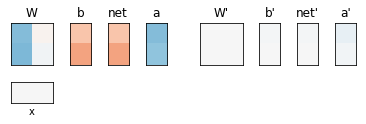

In [8]:
# Params
# ========================================================================
colormap = 'RdBu'
vrange = (-1,1)
tind = 0
pind = 0
layer_name = layer_name
axes_dict = axes_dict
snap = snap
# ========================================================================

for k, ax in axes_dict.items():
    data = snap[tind][layer_name][k]
    if 'biases' in k:
        data = np.expand_dims(data, axis=1)
    if data.ndim > 2:
        data = data[pind]
        if k != 'input_':
            data = data.T
    ax.imshow(data, cmap = colormap, vmin=vrange[0], vmax=vrange[1])

plt.draw()
plt.show()